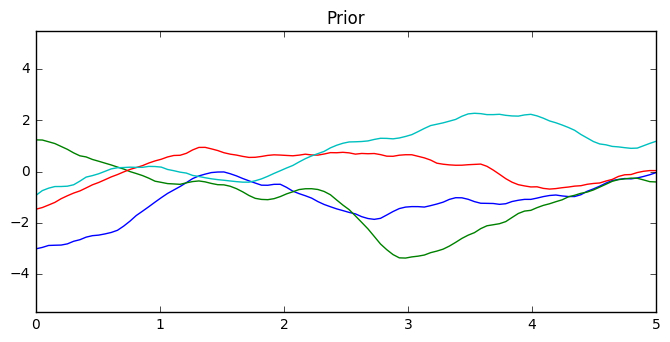

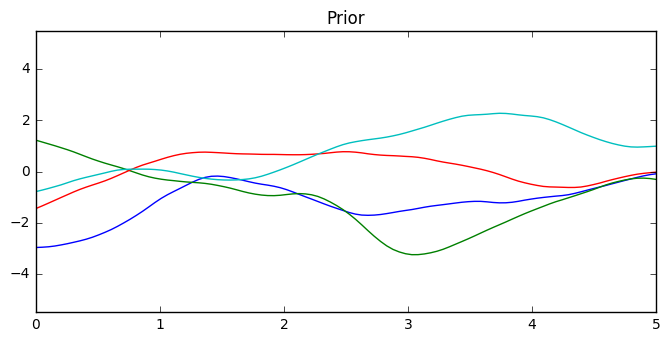

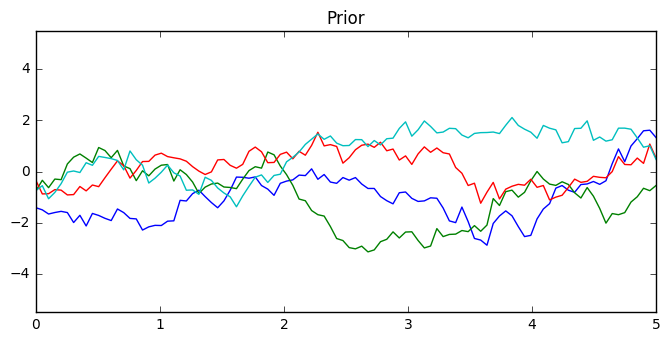

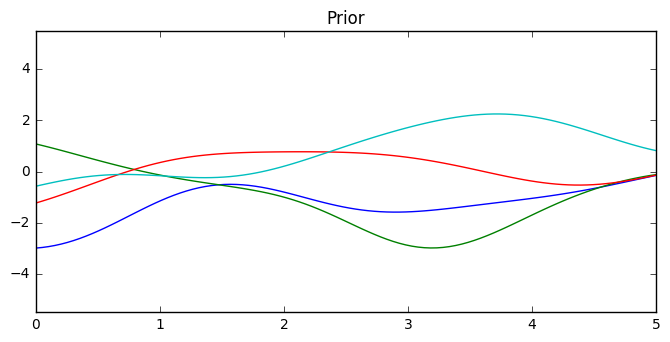

In [11]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0*Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5),
           1.0*Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=2.5),
           1.0*Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=0.5),
           1.0*Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=100)]
           #2.0 * RBF(length_scale=0.4, length_scale_bounds=(1e-1, 10.0)),
           #0.4 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    #plt.plot(X_, y_mean, 'k', lw=3, zorder=9)  #dibuixa linia negra a la mitjana 0
    #plt.fill_between(X_, y_mean - y_std, y_mean + y_std,  #treiem la zona ombrejada corresponent a la desviacio std.
    #                 alpha=0.5, color='g')
    y_samples = gp.sample_y(X_[:, np.newaxis], 4)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-5.5, 5.5)
    plt.title("Prior", fontsize=12)
   

    # Generate data and fit GP
    #rng = np.random.RandomState(4)
    #X = rng.uniform(0, 5, 10)[:, np.newaxis]
    #y = np.sin((X[:, 0] - 2.5) ** 2)
    #gp.fit(X, y)

    # Plot posterior
    #plt.subplot(2, 1, 2)
    #X_ = np.linspace(0, 5, 100)
    #y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    #plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    #plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
    #                 alpha=0.5, color='darkgrey')

    #y_samples = gp.sample_y(X_[:, np.newaxis], 4)
    #plt.plot(X_, y_samples, lw=1)
    #plt.scatter(X[:, 0], y, c='r', s=50, zorder=10)
    #plt.xlim(0, 5)
    #plt.ylim(-3, 3)
    #plt.title("Posterior",fontsize=12)
    #plt.tight_layout()

plt.show()